In [1]:
%load_ext autoreload
%autoreload 2

import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import dive 
import deerlab as dl
from scipy.io import loadmat
import arviz as az

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Load and plot data and reference distribution

In [2]:
Pid = 3992
loaded_data = np.genfromtxt(f"../../data/{Pid}_good.dat", skip_header=1, delimiter=',')
t = loaded_data[:,0]
Vexp = loaded_data[:,1]

P0s = loadmat('..\..\data\edwards_testset\distributions_2LZM.mat')['P0']
rref = np.squeeze(loadmat('..\..\data\edwards_testset\distributions_2LZM.mat')['r0'])
Pref = P0s[Pid-1,:]

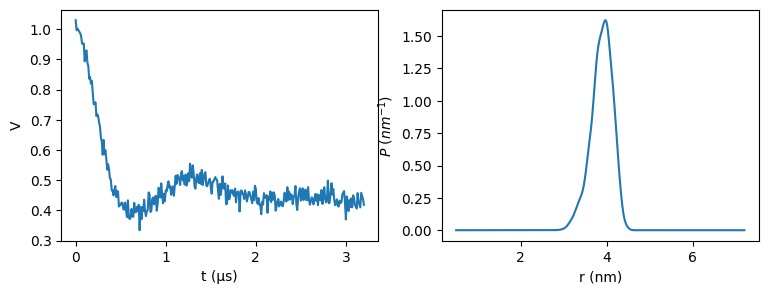

In [3]:
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.plot(t, Vexp)
plt.xlabel('t (µs)')
plt.ylabel('V')

plt.subplot(1,2,2)
plt.plot(rref, Pref)
plt.xlabel('r (nm)')
plt.ylabel(r'$P~(nm^{-1})$')
plt.show()

## Bayes Tikhonov

In [8]:
pars = {"method": 'regularization', "r": np.linspace(2,6,50), "rmax_opt": "user"}
model_tikh = dive.model(t, Vexp, pars)

Time range:         0 µs to 3.2 µs  (321 points, step size 0.01 µs)
Distance range:     2 nm to 6 nm  (50 points, step size 0.0816327 nm)
Vexp max:           1.0298
Background:         exponential
P model:            regularization


In [9]:
m = model_tikh['model']
m

       P ~ N(f(), <constant>)
    lamb ~ Beta(1.3, 2)
    Bend ~ Beta(1, 1.5)
      V0 ~ TruncatedNormal(1, 0.2, 0, inf)
     tau ~ Flat()
   delta ~ Flat()
       k ~ Deterministic(f(Bend))
   sigma ~ Deterministic(f(tau))
lg_alpha ~ Deterministic(f(tau, delta))
       V ~ N(f(V0, P, lamb, Bend), f(tau))

In [10]:
m.initial_point()

{'P': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'lamb_logodds__': array(-1.38629436),
 'Bend_logodds__': array(-0.40546511),
 'V0_interval__': array(0.),
 'tau': array(1.2),
 'delta': array(1.02)}

In [11]:
MCMCparameters = {"draws": 100,"tune": 100, "chains": 2, "cores": 2}
trace = dive.sample(model_tikh, MCMCparameters)

Only 100 samples in chain.
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [V0, lamb, Bend]
>randPnorm_posterior: [P]
>randTau_posterior: [tau]
>randDelta_posterior: [delta]


ValueError: Not enough samples to build a trace.

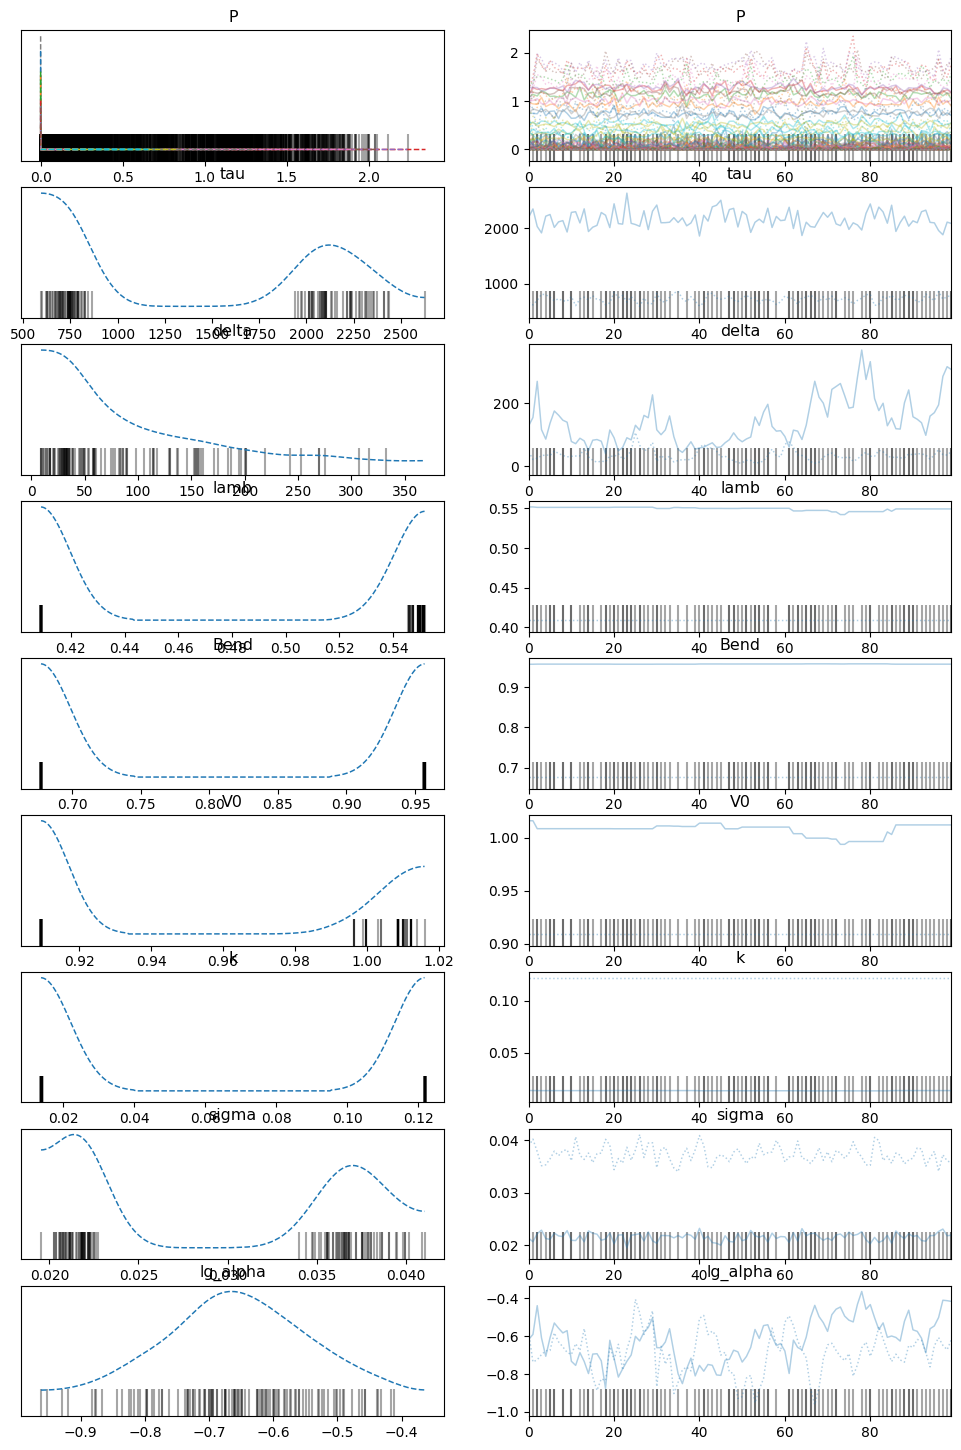

In [8]:
az.plot_trace(trace, combined=True);

In [14]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
P[0],0.076,0.096,0.000,0.260,0.003,0.002,1078.0,1406.0,1.00
P[1],0.061,0.060,0.000,0.172,0.002,0.002,760.0,1105.0,1.00
P[2],0.059,0.055,0.000,0.160,0.002,0.001,825.0,1360.0,1.00
P[3],0.059,0.055,0.000,0.158,0.002,0.001,1255.0,1281.0,1.00
P[4],0.057,0.054,0.000,0.151,0.002,0.001,1145.0,1385.0,1.00
P[5],0.052,0.050,0.000,0.145,0.001,0.001,1396.0,1688.0,1.00
P[6],0.042,0.045,0.000,0.124,0.001,0.001,1687.0,1645.0,1.00
P[7],0.030,0.038,0.000,0.102,0.001,0.001,1707.0,1693.0,1.00
P[8],0.031,0.037,0.000,0.100,0.001,0.001,2095.0,1959.0,1.00
P[9],0.031,0.038,0.000,0.102,0.001,0.001,1929.0,1964.0,1.00


## Bayes Single Gaussian

In [14]:
pars_gauss = {"method": 'gaussian', "r": np.linspace(2,6,50), "nGauss": 1}
model_gauss = dive.model(t, Vexp, pars_gauss)

Time range:         0 µs to 3.2 µs  (321 points, step size 0.01 µs)
Distance range:     2 nm to 6 nm  (50 points, step size 0.0816327 nm)
Vexp max:           1.0298
Background:         exponential
P model:            1 Gaussians


In [15]:
m = model_gauss["model"]
m

r0_rel ~ Beta(2, 2)
     w ~ Unknown(1, 11, 0.1, 0.2, 0.05, 3)
  lamb ~ Beta(1.3, 2)
  Bend ~ Beta(1, 1.5)
    V0 ~ TruncatedNormal(1, 0.2, 0, inf)
 sigma ~ Gamma(0.7, f())
    r0 ~ Deterministic(f(r0_rel))
     k ~ Deterministic(f(Bend))
     V ~ N(f(V0, lamb, w, Bend, r0_rel), sigma)

In [16]:
m.rvs_to_values

{r0_rel ~ Beta(2, 2): r0_rel_logodds__,
 w ~ Unknown(1, 11, 0.1, 0.2, 0.05, 3): w_interval__,
 lamb ~ Beta(1.3, 2): lamb_logodds__,
 Bend ~ Beta(1, 1.5): Bend_logodds__,
 V0 ~ TruncatedNormal(1, 0.2, 0, inf): V0_interval__,
 sigma ~ Gamma(0.7, f()): sigma_log__,
 V ~ N(f(V0, lamb, w, Bend, r0_rel), sigma): V{[1.       ...40631191]}}

In [18]:
MCMCparameters = {"draws": 2000, "tune": 500, "chains": 1, "cores": 1}
trace_gauss = dive.sample(model_gauss,MCMCparameters)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [r0_rel, w, lamb, Bend, V0, sigma]


error: (len(y)-offy>(n-1)*abs(incy)) failed for 1st keyword n: daxpy:n=55

In [ ]:
dive.summary(trace_gauss, model_gauss)  

## DeerLab

In [ ]:
r_dl = np.linspace(2,6,200)

fit = dl.fitmodel(Vexp,t,r_dl,'P',dl.bg_exp,dl.ex_4pdeer,verbose=True)
fit.plot();

print(f'lg(α) = {round(np.log10(fit.regparam),2)}')